# Synthetic Data

In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import pathlib

sns.set_style('darkgrid')

In [2]:
d = np.random.normal(loc=0.0, scale=1.0, size=1000)

In [3]:
a = 15
m = np.linspace(-1,1,a)
s = np.repeat(0.1,a)

data = np.stack([m, s]).T 
df_dist = pd.DataFrame(data, columns = ['mean', 'sd'])

In [4]:
df_dist

,mean,sd
0,-1.000000,0.1
1,-0.857143,0.1
2,-0.714286,0.1
3,-0.571429,0.1
4,-0.428571,0.1
5,-0.285714,0.1
6,-0.142857,0.1
7,0.000000,0.1
8,0.142857,0.1
9,0.285714,0.1


In [22]:
n = 1000
r = np.arange(0,df_dist.shape[0],1)
df = pd.DataFrame()

for i in r:
    if i == 0:
        c = 'N' + '(' + str(round(df_dist['mean'][i],3)) + '|' + str(round(df_dist['sd'][i],3)) + ')'
        df['Dist'] = np.repeat(c,n)
        d = np.random.normal(loc=df_dist['mean'][i], scale=df_dist['sd'][i], size=n)
        df['Values'] = d
    else:
        c = 'N' + '(' + str(round(df_dist['mean'][i],3)) + '|' + str(round(df_dist['sd'][i],3)) + ')'
        mdf = pd.DataFrame()
        mdf['Dist'] = np.repeat(c,n)
        d = np.random.normal(loc=df_dist['mean'][i], scale=df_dist['sd'][i], size=n)
        mdf['Values'] = d
        df = df.append(mdf, ignore_index=True)

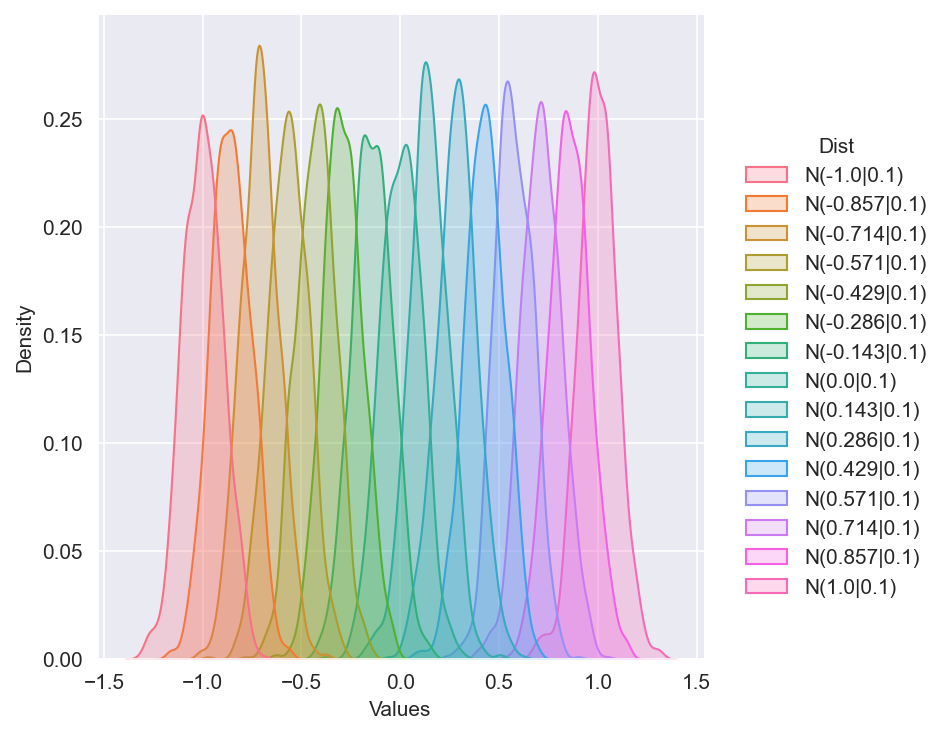

In [23]:
p = sns.displot(df, x="Values", hue="Dist" , kind="kde", fill=True)
p.fig.set_dpi(150)

# Classes & Dimensions

In [25]:
n_c = 10
dims = 3
l = np.arange(0,n_c,1)
centers = pd.DataFrame()

for i in l:
    c = np.random.uniform(low=-1.0, high=1.0, size=dims)
    centers[str(i)] = c

centers # Shape: (dims x classes)

,0,1,2,3,4,5,6,7,8,9
0,-0.505629,-0.568140,-0.839297,0.438422,-0.040281,-0.389894,-0.496296,0.584418,0.769472,0.980444
1,0.982720,0.486939,0.274037,0.974587,-0.119448,-0.454654,0.561718,-0.875854,0.366331,-0.004094
2,0.085637,-0.176790,0.344279,0.988613,-0.815207,0.665019,-0.789642,0.289557,-0.698738,-0.405393


In [26]:
s_samp = 0.01
samp_size = 10
index = []

samps1 = []

for i in np.arange(0,centers.shape[1],1):
    if i % 100 == 0:
        print(i)
    for j in np.arange(0,centers.shape[0],1):
        s = np.random.normal(loc=centers[str(i)][j], scale= s_samp, size= samp_size)
        samps1.append(s)

0


In [24]:
samps1.loc['0',:]

,0,1,2,3,4,5,6,7,8,9
0,-0.170063,-0.201199,-0.173582,0.190888,0.333050,0.394177,-0.047586,0.249745,-0.414700,-0.055897
0,0.175614,0.339222,-0.011774,0.314007,-0.331486,0.436462,0.292781,0.070904,-0.170043,0.486975
0,0.232676,-0.034587,-0.014544,-0.115239,-0.060604,0.132904,0.135725,-0.166030,-0.805470,-0.669782


In [4]:
samps1[0][:10]

array([ 0.05386336,  3.04244613,  3.3114565 , -1.03388426,  1.1745352 ,
       -0.48540261,  2.69171218,  0.38450507,  1.35571489,  1.65693911])

In [5]:
samps2 = np.array(samps1)

In [6]:
samps3 = pd.DataFrame(samps2)

In [7]:
samps3.head()

,0,1,2,3,4,5,6,7,8,9
0,0.053863,3.042446,3.311456,-1.033884,1.174535,-0.485403,2.691712,0.384505,1.355715,1.656939
1,1.826791,-2.755257,-0.798722,0.168691,0.262343,-0.304659,-1.712462,-1.978082,1.910109,-0.798662
2,-0.582479,-0.087693,-0.884236,-1.182145,0.044933,-2.761754,0.565271,-0.265698,-1.854203,-1.650284
3,0.099493,1.809186,-0.816046,1.398421,0.662482,1.431609,-0.051922,0.464433,1.690711,-0.064146
4,0.635777,0.468944,-0.840334,0.973605,1.932523,3.725161,0.684982,1.368526,0.981258,3.966785


In [8]:
npArray = np.array( [ [77, 88, 99] , [31,42,63] , [11,22,33]])

In [9]:
npArray.shape

(3, 3)

In [30]:
s_samp = 1.25
samp_size = 10
index = []

samps1 = []

for i in np.arange(0,centers.shape[1],1):
    if i % 100 == 0:
        print(i)
    for j in np.arange(0,centers.shape[0],1):
        s = np.random.normal(loc=centers[str(i)][j], scale= s_samp, size= samp_size)
        samps1.append(s)

samps1 = np.array(samps1)

# Normalize everything
m_val = np.abs(samps1).max() 
samps1 = np.divide(samps1, m_val) 
        
print('We are going to the data frame creation.')
samps1 = pd.DataFrame(samps1)
print('Data frame creation successfully finished.')

for i in centers.columns:
    t = np.repeat(str(i),dims)
    for j in t:
        index.append(j)
samps1.index = index
samps1 = samps1.sample(frac=1)
print('We are done. ')

# Smaps have shape: (dims * classes   x   samp_size) (40x7)

0
We are going to the data frame creation.
Data frame creation successfully finished.
We are done. 


In [28]:
samps1.head(20)

,0,1,2,3,4,5,6,7,8,9
6,-0.783914,-0.790676,-0.800426,-0.802566,-0.774387,-0.791342,-0.788884,-0.776795,-0.784044,-0.797854
6,0.564195,0.573095,0.558062,0.561436,0.544264,0.564942,0.547745,0.559340,0.559972,0.559329
1,-0.574550,-0.569754,-0.573696,-0.565414,-0.564059,-0.563614,-0.560328,-0.575107,-0.566433,-0.550707
2,-0.836461,-0.844148,-0.829142,-0.829563,-0.841122,-0.837236,-0.844884,-0.852747,-0.845991,-0.838732
7,-0.858142,-0.860425,-0.874804,-0.875728,-0.876052,-0.861097,-0.854317,-0.872502,-0.858849,-0.858554
0,-0.489923,-0.501044,-0.512363,-0.499775,-0.523090,-0.514115,-0.502940,-0.498646,-0.507418,-0.498729
7,0.263018,0.304622,0.279100,0.295293,0.290581,0.287286,0.306274,0.287222,0.282100,0.292387
4,-0.132379,-0.107237,-0.130760,-0.118788,-0.123020,-0.106307,-0.120502,-0.115026,-0.132296,-0.109209
4,-0.824811,-0.813552,-0.819535,-0.828622,-0.819419,-0.815879,-0.806722,-0.790587,-0.808766,-0.811483
4,-0.038344,-0.037257,-0.019851,-0.041783,-0.034146,-0.028034,-0.043340,-0.034522,-0.032006,-0.048643


In [54]:
s_samp = 0.001
samp_size = 1000
index = []

samps = pd.DataFrame(np.zeros(samp_size)).T

for i in np.arange(0,centers.shape[1],1): # Go through each column
    if i % 10 == 0:
        print(i)
    for j in np.arange(0,centers.shape[0],1): # Go through each row
        #index.append(str(j))
        s = pd.DataFrame(np.random.normal(loc=centers[str(i)][j], scale= s_samp, size= samp_size)).T
        samps = samps.append(s, ignore_index= False)
    
samps = samps.iloc[1:,:]

for i in centers.columns:
    t = np.repeat(str(i),dims)
    for j in t:
        index.append(j)
samps.index = index

# Samps have shape: (dims * classes   x   samp_size)

# 10 samps: 6 min 22s
# 500 samps: 100 runs took 6m 14s 
# 250 samps: 100 runs took 1 min 55s / 200 runs took  7 min 18 s

0
10
20
30
40
50
60
70
80
90


In [60]:
samps.tail()
# Number of columns = Number of Samples
# Rows are Classes: In 3d, there are 3 indices for 0, where every index represents a dimension of the class

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
99,-0.834990,-0.835605,-0.834021,-0.835824,-0.835685,-0.834114,-0.834111,-0.834397,-0.833513,-0.836397,...,-0.835497,-0.835265,-0.835319,-0.834499,-0.836362,-0.835139,-0.833325,-0.833849,-0.836452,-0.834680
99,-0.538785,-0.539103,-0.541058,-0.537964,-0.539051,-0.541047,-0.541401,-0.538008,-0.538605,-0.540258,...,-0.538542,-0.539499,-0.537638,-0.538121,-0.540325,-0.540034,-0.539758,-0.538108,-0.538154,-0.540620
99,0.590655,0.591053,0.592496,0.590294,0.591166,0.590751,0.591351,0.590696,0.590562,0.591582,...,0.593530,0.592301,0.591121,0.590938,0.589921,0.590978,0.591002,0.589640,0.591166,0.591317
99,0.121716,0.120351,0.121096,0.121078,0.122971,0.123398,0.123366,0.123725,0.123126,0.120920,...,0.122226,0.122663,0.122547,0.121461,0.122402,0.121440,0.122401,0.122689,0.122803,0.122050
99,0.925547,0.927126,0.926100,0.927467,0.927075,0.925025,0.926422,0.926534,0.925799,0.925092,...,0.925139,0.926780,0.926970,0.925995,0.925877,0.924472,0.925776,0.925900,0.926072,0.926009


In [61]:
samps1.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
99,-0.835340,-0.835166,-0.836839,-0.836027,-0.834585,-0.836330,-0.835700,-0.835809,-0.835859,-0.835440,...,-0.835284,-0.836586,-0.836494,-0.836404,-0.835301,-0.834769,-0.833220,-0.835132,-0.834842,-0.835803
99,-0.539141,-0.539729,-0.538935,-0.540228,-0.536561,-0.540016,-0.537357,-0.538264,-0.538435,-0.538494,...,-0.539919,-0.537424,-0.539119,-0.538447,-0.538017,-0.537645,-0.539851,-0.539898,-0.540621,-0.537836
99,0.592304,0.588984,0.590373,0.590325,0.590339,0.590829,0.588782,0.590311,0.590773,0.591042,...,0.590069,0.591989,0.591370,0.591017,0.591459,0.591126,0.591845,0.592793,0.590418,0.590843
99,0.122410,0.121859,0.123593,0.124450,0.122473,0.121850,0.123652,0.123568,0.122490,0.121323,...,0.123231,0.124042,0.124381,0.124315,0.121436,0.124501,0.123649,0.123891,0.123931,0.123373
99,0.925441,0.925340,0.925154,0.926704,0.924636,0.924736,0.924573,0.926148,0.924046,0.925139,...,0.925330,0.925271,0.927355,0.925598,0.924201,0.926461,0.927131,0.924750,0.924696,0.925767


In [ ]:
pd.concat(axis=1)

s_samp = 1.25
samp_size = 10
index = []

samps = pd.DataFrame(np.zeros(samp_size)).T

for i in np.arange(0,centers.shape[1],1):
    if i % 10 == 0:
        print(i)
    for j in np.arange(0,centers.shape[0],1):
        #index.append(str(j))
        s = pd.DataFrame(np.random.normal(loc=centers[str(i)][j], scale= s_samp, size= samp_size)).T
        samps = samps.append(s, ignore_index= False)
    
samps = samps.iloc[1:,:]

for i in centers.columns:
    t = np.repeat(str(i),dims)
    for j in t:
        index.append(j)
samps.index = index

In [15]:
t = pd.DataFrame([1,2,3])
t1 = pd.DataFrame([4,5,6])

df_list = [t, t1]

In [16]:
df_list

[   0
 0  1
 1  2
 2  3,
    0
 0  4
 1  5
 2  6]

In [17]:
pd.concat(df_list, axis=1)


,0,0
0,1,4
1,2,5
2,3,6


# Visualisation 3D

In [23]:
# def get_cmap(n, name='hsv'):
#     '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
#     RGB color; the keyword argument name must be a standard mpl colormap name.'''
#     return plt.cm.get_cmap(name, n)

# color = get_cmap(n_c)

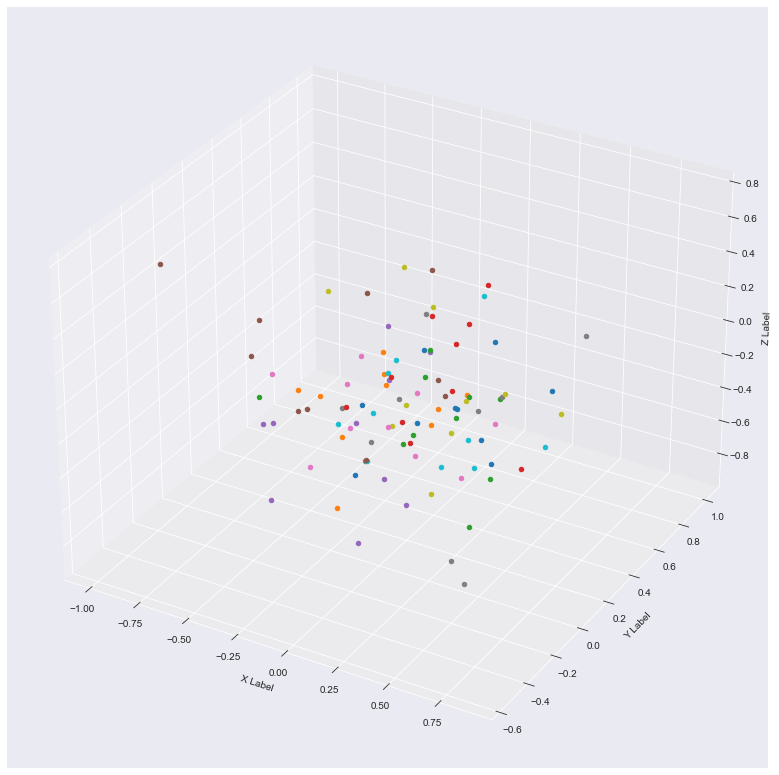

In [31]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')

color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in np.unique(index):
    for j in samps1.columns:
        d = samps1.loc[i,j]
        for xs, ys, zs in [d]:
            ax.scatter(xs, ys, zs, c = color[int(i)]) # color[int(i)]  color(int(i))

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Saving the Data 

In [40]:
import pathlib
path = str(pathlib.Path().resolve())
path = path + '/' + str(n_c) + 'c' + str(dims) + 'd' + str(samp_size) + 's' + '.csv'
samps.to_csv(path_or_buf=path, index=True)

# Loading Numpy Datafile

In [ ]:
# np.save(str(n_c) + 'c' + str(dims) + 'd' + str(samp_size) + 's' + '.npy', samps)

In [2]:
test = np.load('10c10d1000s.npy')
test1 = pd.DataFrame(test)

In [46]:
test1 = pd.read_csv(path, index_col=0)

In [47]:
test1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.185503,0.048277,0.034237,-0.086304,-0.046403,0.072027,0.100557,0.064865,-0.004438,0.007455,...,0.109843,-0.201230,0.038291,-0.190347,-0.064877,-0.061670,-0.174631,0.143261,0.114696,0.033376
0,0.065262,0.103971,0.090397,0.167386,-0.000239,-0.039240,-0.076280,-0.102328,0.084089,0.119389,...,0.012123,0.171854,0.029824,0.057980,0.092331,0.120863,-0.070985,0.132237,0.191634,0.165033
0,0.221981,-0.030563,0.146852,0.264742,0.154689,0.033391,-0.025927,-0.068234,0.079443,0.234702,...,0.069021,0.001534,0.134593,-0.030035,0.308122,0.028093,-0.160576,0.024199,-0.045810,-0.027357
1,-0.039994,0.093823,0.089116,-0.150367,-0.067404,-0.083801,-0.013010,0.082428,-0.180762,0.054683,...,-0.123719,0.006357,-0.085391,-0.066203,0.092620,0.159893,-0.014514,-0.166780,-0.277781,0.013263
1,1.090463,0.921342,0.918728,0.922731,0.911242,0.906659,0.920659,0.967852,1.104590,0.998622,...,0.838706,1.020004,1.109838,1.120133,0.898641,0.857995,0.821770,0.870713,0.913331,0.988021


In [70]:
s  =test1.loc[0,:]
s['0']

0   -0.185503
0    0.065262
0    0.221981
Name: 0, dtype: float64

In [68]:
torch.Tensor(np.array(s['0']))

tensor([-0.1855,  0.0653,  0.2220])

In [7]:
# Now I have to iterate through the data frame, store each sample as a torch.tensor and the index as an int within a tuple

(100, 1000)

In [61]:
test1.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96',
       '97', '98', '99'],
      dtype='object')

In [63]:
np.unique(test1.index)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Loading a CSV file

In [12]:
import pathlib

n_c = 10
dims = 3
samp_size = 100

path = str(pathlib.Path().resolve())
path = path + '/' + str(n_c) + 'c' + str(dims) + 'd' + str(samp_size) + 's' + '.csv'
df = pd.read_csv(path, index_col=0)

In [80]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.185503,0.048277,0.034237,-0.086304,-0.046403,0.072027,0.100557,0.064865,-0.004438,0.007455,...,0.109843,-0.201230,0.038291,-0.190347,-0.064877,-0.061670,-0.174631,0.143261,0.114696,0.033376
0,0.065262,0.103971,0.090397,0.167386,-0.000239,-0.039240,-0.076280,-0.102328,0.084089,0.119389,...,0.012123,0.171854,0.029824,0.057980,0.092331,0.120863,-0.070985,0.132237,0.191634,0.165033
0,0.221981,-0.030563,0.146852,0.264742,0.154689,0.033391,-0.025927,-0.068234,0.079443,0.234702,...,0.069021,0.001534,0.134593,-0.030035,0.308122,0.028093,-0.160576,0.024199,-0.045810,-0.027357
1,-0.039994,0.093823,0.089116,-0.150367,-0.067404,-0.083801,-0.013010,0.082428,-0.180762,0.054683,...,-0.123719,0.006357,-0.085391,-0.066203,0.092620,0.159893,-0.014514,-0.166780,-0.277781,0.013263
1,1.090463,0.921342,0.918728,0.922731,0.911242,0.906659,0.920659,0.967852,1.104590,0.998622,...,0.838706,1.020004,1.109838,1.120133,0.898641,0.857995,0.821770,0.870713,0.913331,0.988021


In [82]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72',
       '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84',
       '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96',
       '97', '98', '99'],
      dtype='object')

In [83]:
s  =df.loc[0,:]
s['0']

0   -0.185503
0    0.065262
0    0.221981
Name: 0, dtype: float64

In [15]:
ten = torch.Tensor(np.array(s['0']))

In [17]:
ten.shape

torch.Size([3])

In [19]:
t = (ten, 0)

In [28]:
cols = (df.columns)
rows = np.unique(df.index)

samps = []

for i in rows:
    s  = df.loc[int(i),:]
    for j in cols:
        t = torch.Tensor(np.array(s[str(j)]))
        tup = (t, int(i))
        samps.append(tup)


In [29]:
len(samps)

1000

In [40]:
samps[0:2]

[(tensor([-0.1855,  0.0653,  0.2220]), 0),
 (tensor([ 0.0483,  0.1040, -0.0306]), 0)]

In [41]:
trainset = torch.utils.data.DataLoader(samps, batch_size = 10, shuffle = True)

In [43]:
for data in trainset:
    print(data)
    break

[tensor([[ 0.9384, -0.6813, -0.5792],
        [ 0.5990, -0.2131,  0.7519],
        [-0.4585,  0.0377,  0.5862],
        [ 0.6155, -0.2217,  0.6854],
        [ 0.4549,  0.5920,  0.1879],
        [-0.5403,  0.4145, -0.4885],
        [ 0.5647, -0.2995,  0.6191],
        [-0.4043, -0.1031,  0.4511],
        [ 0.0768,  1.0740,  0.4784],
        [-0.4582, -0.9078, -0.5692]]), tensor([5, 6, 8, 6, 3, 9, 6, 8, 2, 7])]


In [44]:
type(trainset)

torch.utils.data.dataloader.DataLoader

In [ ]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.patches import FancyArrowPatch
# from mpl_toolkits.mplot3d import proj3d
# import numpy as np

# # interactive mode off, can [normally] be safely removed
# plt.ioff()

# # define an arrow class:
# class Arrow3D(FancyArrowPatch):
#     def __init__(self, start=[0,0,0], end=[1,1,1], *args, **kwargs):
#         if "arrowstyle" not in kwargs:
#             kwargs["arrowstyle"] = "-|>"
#         if "mutation_scale" not in kwargs:
#             kwargs["mutation_scale"] = 20
#         if "color" not in kwargs:
#             kwargs["color"] = "k"
#         FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
#         xs = [start[0], end[0]]
#         ys = [start[1], end[1]]
#         zs = [start[2], end[2]]
#         self._verts3d = xs, ys, zs

#     def draw(self, renderer):
#         xs3d, ys3d, zs3d = self._verts3d
#         xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
#         self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
#         FancyArrowPatch.draw(self, renderer)

# def WireframeSphere(centre=[0.,0.,0.], radius=1.,
#                     n_meridians=20, n_circles_latitude=None):
#     """
#     Create the arrays of values to plot the wireframe of a sphere.

#     Parameters
#     ----------
#     centre: array like
#         A point, defined as an iterable of three numerical values.
#     radius: number
#         The radius of the sphere.
#     n_meridians: int
#         The number of meridians to display (circles that pass on both poles).
#     n_circles_latitude: int
#         The number of horizontal circles (akin to the Equator) to display.
#         Notice this includes one for each pole, and defaults to 4 or half
#         of the *n_meridians* if the latter is larger.

#     Returns
#     -------
#     sphere_x, sphere_y, sphere_z: arrays
#         The arrays with the coordinates of the points to make the wireframe.
#         Their shape is (n_meridians, n_circles_latitude).

#     Examples
#     --------
#     # >>> fig = plt.figure()
#     # >>> ax = fig.gca(projection='3d')
#     # >>> ax.set_aspect("equal")
#     # >>> sphere = ax.plot_wireframe(*WireframeSphere(), color="r", alpha=0.5)
#     # >>> fig.show()

#     # >>> fig = plt.figure()
#     # >>> ax = fig.gca(projection='3d')
#     # >>> ax.set_aspect("equal")
#     # >>> frame_xs, frame_ys, frame_zs = WireframeSphere()
#     # >>> sphere = ax.plot_wireframe(frame_xs, frame_ys, frame_zs, color="r", alpha=0.5)
#     # >>> fig.show()
#     # """
#     if n_circles_latitude is None:
#         n_circles_latitude = max(n_meridians/2, 4)
#     u, v = np.mgrid[0:2*np.pi:n_meridians*1j, 0:np.pi:n_circles_latitude*1j]
#     sphere_x = centre[0] + radius * np.cos(u) * np.sin(v)
#     sphere_y = centre[1] + radius * np.sin(u) * np.sin(v)
#     sphere_z = centre[2] + radius * np.cos(v)
#     return sphere_x, sphere_y, sphere_z

# def find_most_distants(points, center=[0.,0.,0.], tol=1e-5):
#     """
#     Finds and returns a list of points that are the most distante ones to
#     the center.    

#     Parameters
#     ----------
#     points: list
#         A list of points (see center to know what a point is)
#     center: array like
#         A point, defined as an iterable of three numerical values.
#     """
#     # make central point an array to ease vector calculations
#     center = np.asarray(center)
#     # find most distant points
#     max_distance = 0
#     most_distant_points = []
#     for point in points:
#         distance = np.linalg.norm(center-point)
#         if abs(distance - max_distance) <= tol:
#             most_distant_points.append(point)
#         elif distance > max_distance:
#             most_distant_points = [point]
#             max_distance = distance
#     return max_distance, most_distant_points

# def list_of_points_TO_lists_of_coordinates(list_of_points):
#     """
#     Converts a list of points to lists of coordinates of those points.

#     Parameter
#     ---------
#     list_of_points: list
#         A list of points (each defined as an iterable of three numerical values)

#     Returns
#     -------
#     points_x, points_y, points_z: array
#         Lists of coordinates
#     """
#     points_x = []
#     points_y = []
#     points_z = []
#     for point in list_of_points:
#         points_x.append(point[0])
#         points_y.append(point[1])
#         points_z.append(point[2])
#     return points_x, points_y, points_z

# def function(central_point=[0.,0.,0.],
#              other_points=[[1., 2., 2.23],
#                            [2., 3., 3.6],
#                            [-3., 4., 5.]],):
#     """
#     Draws a wireframe sphere centered on central_point and containing all
#     points in other_points list. Also draws the points inside the sphere and
#     marks the most distant ones with an arrow.

#     Parameters
#     ----------
#     central_point: array like
#         A point, defined as an iterable of three numerical values.
#     other_points: list
#         A list of points (see central_point to know what a point is)
#     """
#     # find most distant points
#     max_distance, most_distant_points = find_most_distants(other_points, central_point)
#     #prepare figure and 3d axis
#     fig = plt.figure()
#     ax = fig.gca(projection='3d')
#     ax.set_aspect("equal")
#     #draw sphere
#     ax.plot_wireframe(*WireframeSphere(central_point, max_distance), color="r", alpha=0.5)
#     # draw points
#     ax.scatter(*list_of_points_TO_lists_of_coordinates(other_points))
#     # draw arrows to most distant points:
#     for extreme_point in most_distant_points:
#         ax.add_artist(Arrow3D(start=central_point, end=extreme_point))
#     fig.show()

# if __name__ == '__main__':
#     function([0,0,0], 2*np.random.rand(50,3)-1)
#     # make a list with equally most distant point:
#     repeated_max_list = 2*np.random.rand(10,3)-1
#     distance, points = find_most_distants(repeated_max_list)
#     repeated_max_list =  np.concatenate((repeated_max_list,points))
#     repeated_max_list[-1][0] = -repeated_max_list[-1][0]
#     repeated_max_list[-1][1] = -repeated_max_list[-1][1]
#     repeated_max_list[-1][2] = -repeated_max_list[-1][2]
#     function([0,0,0], repeated_max_list)

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

# Creating Function for Traina and Test Data

In [129]:
def data_generator(n_c, dims, sd_samp, samp_size, test_prop, to_csv):
    l = np.arange(0,n_c,1)
    centers = pd.DataFrame()


    # Creating the Centers
    for i in l:
        c = np.random.uniform(low=-1.0, high=1.0, size=dims)
        centers[str(i)] = c

    ######## Training Data

    # Drawing Samples
    index = []
    train = pd.DataFrame(np.zeros(samp_size)).T

    for i in np.arange(0,centers.shape[1],1):
        for j in np.arange(0,centers.shape[0],1):
            #index.append(str(j))
            s = pd.DataFrame(np.random.normal(loc=centers[str(i)][j], scale= sd_samp, size= samp_size)).T
            train = train.append(s, ignore_index= False)
        
    train = train.iloc[1:,:]

    for i in centers.columns:
        t = np.repeat(str(i),dims)
        for j in t:
            index.append(j)
    train.index = index

    if to_csv:
        path = str(pathlib.Path().resolve()) # Get the current path where this file is stored
        path = path + '/' + str(n_c) + 'c' + str(dims) + 'd' + str(samp_size) + 's' + '_train' + '.csv'
        train.to_csv(path_or_buf=path, index=True)
    
    ######## Testing Data

    # Drawing Samples
    index = []
    samp_size = int(samp_size * test_prop)
    test = pd.DataFrame(np.zeros(samp_size)).T

    for i in np.arange(0,centers.shape[1],1):
        for j in np.arange(0,centers.shape[0],1):
            #index.append(str(j))
            s = pd.DataFrame(np.random.normal(loc=centers[str(i)][j], scale= sd_samp, size= samp_size)).T
            test = test.append(s, ignore_index= False)
        
    test = test.iloc[1:,:]

    for i in centers.columns:
        t = np.repeat(str(i),dims)
        for j in t:
            index.append(j)
    test.index = index

    if to_csv:
        path = str(pathlib.Path().resolve()) # Get the current path where this file is stored
        path = path + '/' + str(n_c) + 'c' + str(dims) + 'd' + str(samp_size) + 's' + '_test' + '.csv'
        test.to_csv(path_or_buf=path, index=True)
    
    return train, test

In [143]:
train, test = data_generator(n_c = 10, dims = 3, sd_samp = 0.1, samp_size=100, test_prop = 0.2, to_csv=True)

In [140]:
bla1 = torch.utils.data.DataLoader(t, batch_size = 10, shuffle = True)

In [142]:
len(bla1)

100

In [84]:
def csv_torch(df):

    # Creating Tuples
    cols = (df.columns)
    rows = np.unique(df.index)

    samps = []

    for i in rows:
        s  = df.loc[str(i),:]
        for j in cols:
            t = torch.Tensor(np.array(s[int(j)]))
            tup = (t, int(i))
            samps.append(tup)
    return samps

In [90]:
test1 = csv_torch(test)

In [93]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.654006,0.447810,0.552874,0.670752,0.396097,0.447020,0.501722,0.516721,0.618241,0.651305,...,0.610125,0.603971,0.416509,0.445259,0.547049,0.460551,0.610333,0.678664,0.448648,0.636209
0,-0.520170,-0.442252,-0.478547,-0.594563,-0.189182,-0.410736,-0.373599,-0.472853,-0.664414,-0.489639,...,-0.494394,-0.371387,-0.574867,-0.358101,-0.465533,-0.431682,-0.390886,-0.397412,-0.384447,-0.660408
0,-0.366042,-0.316027,-0.541685,-0.410747,-0.296659,-0.647033,-0.363571,-0.435146,-0.313704,-0.372479,...,-0.203934,-0.421097,-0.338028,-0.317266,-0.325120,-0.216428,-0.407660,-0.417943,-0.314146,-0.357374
1,-0.256369,-0.435244,-0.736039,-0.489975,-0.497322,-0.458864,-0.509920,-0.424845,-0.407586,-0.295505,...,-0.394155,-0.575971,-0.420435,-0.451182,-0.403637,-0.649826,-0.395935,-0.630934,-0.503615,-0.375400
1,-0.591697,-0.425633,-0.467885,-0.449438,-0.376583,-0.183350,-0.374084,-0.402028,-0.354322,-0.561481,...,-0.315685,-0.459620,-0.470126,-0.422791,-0.427954,-0.292972,-0.472601,-0.368963,-0.578211,-0.535924


In [96]:
type(test1)

list